In [1]:
library(Seurat)
library(ggplot2)
library(enrichR)
library(stringr)
library(RColorBrewer)
library(pheatmap)
library(dplyr)
library(scales)
library(dplyr)
library(ComplexHeatmap)
library(circlize)
library(tidyr)
library(tibble)
library(grid)

Warning message:
“package ‘Seurat’ was built under R version 4.3.3”
Loading required package: SeuratObject

Warning message:
“package ‘SeuratObject’ was built under R version 4.3.3”
Loading required package: sp

Warning message:
“package ‘sp’ was built under R version 4.3.3”

Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Welcome to enrichR
Checking connection ... 

Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Warning message:
“package ‘stringr’ was built under R version 4.3.3”
Warning message:
“package ‘RColorBrewer’ was built under R version 4.3.3”
Warning message:
“package ‘pheatmap’ was built under R version 4.3.3”
Warning message:
“package ‘dplyr’ was built under R version 4.3.3”

Attaching package: ‘dplyr’


The following objects are masked fro

In [91]:
dim(ifnb)

[1]  36601 231216

In [92]:
unique(ifnb@meta.data$celltype)

[1] "excitatory neurons"              "oligodendrocyte precursor cells"
[3] "oligodendrocytes"                "inhibitory neurons"             
[5] "astrocytes"                      "microglia"                      
[7] "endothelia cells"                "pericytes"

In [ ]:
ifnb = readRDS("hc_rbd_pd_joint_integrated.rds")

In [3]:
ifnb

An object of class Seurat 
36601 features across 231216 samples within 1 assay 
Active assay: RNA (36601 features, 2000 variable features)
 3 layers present: data, counts, scale.data
 3 dimensional reductions calculated: pca, integrated.cca, umap

In [3]:
ifnb_testct <- subset(ifnb, subset = celltype == "microglia")

In [15]:
dim(ifnb_testct)

[1] 36601 11332

In [40]:
ifnb_testct

An object of class Seurat 
36601 features across 11332 samples within 1 assay 
Active assay: RNA (36601 features, 2000 variable features)
 3 layers present: data, counts, scale.data
 3 dimensional reductions calculated: pca, integrated.cca, umap

In [37]:
head(ifnb_testct)

,orig.ident,nCount_RNA,nFeature_RNA,nCount_ATAC,nFeature_ATAC,nucleosome_signal,nucleosome_percentile,TSS.enrichment,TSS.percentile,celltype,batch,disease,unintegrated_clusters,seurat_clusters,RNA_snn_res.1
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>,<fct>,<fct>
HC0763PFC_MAH_AAACCGGCAATCATGT-1,SeuratProject,3696,1952,25734,11582,0.5473629,0.26,3.359544,0.51,microglia,HC0763PFC_MAH,HC,40,31,31
HC0763PFC_MAH_AAACGGATCCGTTATT-1,SeuratProject,1114,804,2629,1335,0.5167910,0.18,4.544608,0.86,microglia,HC0763PFC_MAH,HC,12,10,10
HC0763PFC_MAH_AACCGGCTCGCACACA-1,SeuratProject,1747,1219,1306,677,0.5118110,0.17,5.478732,0.96,microglia,HC0763PFC_MAH,HC,40,31,31
HC0763PFC_MAH_AACCTTGCAGCTAACC-1,SeuratProject,6929,2742,7089,3639,0.6978748,0.68,2.966654,0.37,microglia,HC0763PFC_MAH,HC,70,30,30
HC0763PFC_MAH_AATGGCGCACTAAATC-1,SeuratProject,2759,1610,1509,792,0.4436937,0.06,2.985903,0.38,microglia,HC0763PFC_MAH,HC,40,31,31
HC0763PFC_MAH_ACCAAGCGTCATAAGT-1,SeuratProject,5979,2844,4061,2112,0.6461353,0.55,3.339127,0.50,microglia,HC0763PFC_MAH,HC,10,8,8
HC0763PFC_MAH_ACCATTAAGGGCTTTG-1,SeuratProject,1130,838,10724,5067,0.4394067,0.05,3.538927,0.57,microglia,HC0763PFC_MAH,HC,12,10,10
HC0763PFC_MAH_ACGACAAAGAACAAGT-1,SeuratProject,5675,2714,18989,8925,0.6375294,0.52,3.799692,0.66,microglia,HC0763PFC_MAH,HC,58,35,35
HC0763PFC_MAH_AGAAACCCAATCCTGA-1,SeuratProject,2329,1391,6867,3451,0.6304348,0.50,3.682394,0.62,microglia,HC0763PFC_MAH,HC,40,31,31


# Exploratory analysis

## Clustering Mic cells to subtypes

In [4]:
ifnb_testct <- FindNeighbors(ifnb_testct, reduction = "integrated.cca", dims = 1:30)
ifnb_testct <- FindClusters(ifnb_testct, resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11332
Number of edges: 631561

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8353
Number of communities: 11
Elapsed time: 2 seconds


In [5]:
ifnb_testct <- RunUMAP(ifnb_testct, dims = 1:30, reduction = "integrated.cca")

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
00:20:43 UMAP embedding parameters a = 0.9922 b = 1.112

00:20:43 Read 11332 rows and found 30 numeric columns

00:20:43 Using Annoy for neighbor search, n_neighbors = 30

00:20:43 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

00:20:47 Writing NN index file to temp file /tmp/RtmpA0DmWy/file270411a23612a

00:20:47 Searching Annoy index using 1 thread, search_k = 3000

00:20:51 Annoy recall = 64.28%

00:20:51 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbo

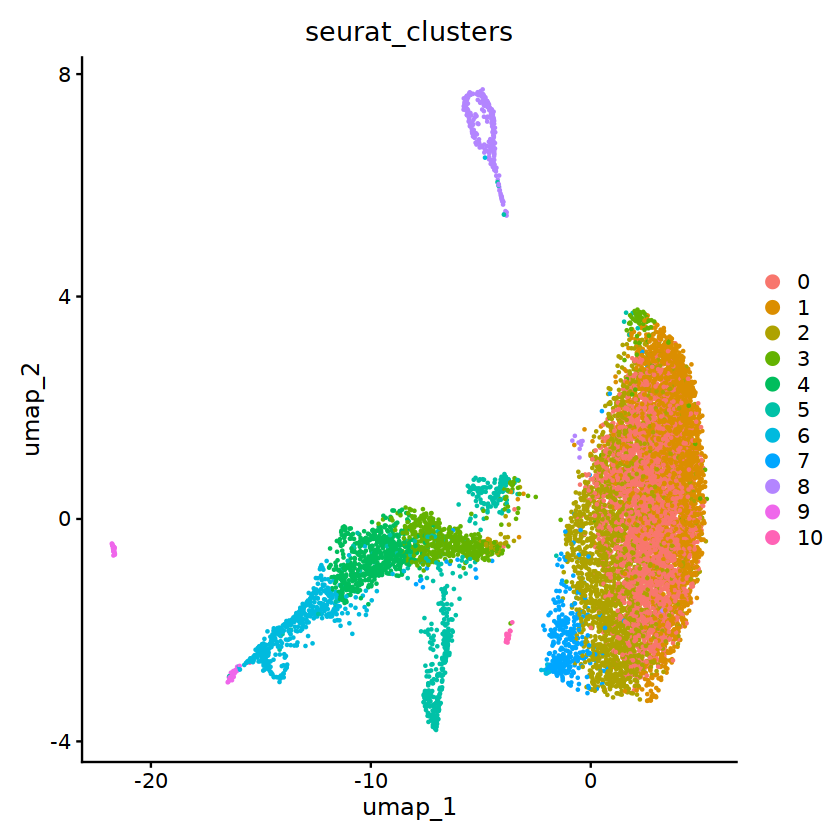

In [6]:
DimPlot(ifnb_testct, reduction = "umap", group.by = c("seurat_clusters"), pt.size = 0.1)

In [5]:
ifnb_testct <- RunUMAP(ifnb_testct, dims = 1:30, reduction = "integrated.cca", min.dist = 1.5, spread = 5.0)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
15:48:17 UMAP embedding parameters a = 0.02765 b = 1.112

15:48:17 Read 11332 rows and found 30 numeric columns

15:48:17 Using Annoy for neighbor search, n_neighbors = 30

15:48:17 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:48:21 Writing NN index file to temp file /tmp/Rtmppy4l6v/file13a1ba4f7cc8de

15:48:21 Searching Annoy index using 1 thread, search_k = 3000

15:48:24 Annoy recall = 64.28%

15:48:24 Commencing smooth kNN distance calibration using 1 thread
 with target n_neigh

In [ ]:
# Define the custom color palette
custom_colors <- c(
"#4E79A7", "#F28E2B", "#E15759", "#76B7B2",
  "#59A14F", "#EDC949", "#AF7AA1", "#FF9DA7",
  "#9C755F", "#6A3D9A", "#B15928"
)
ifnb_testct_filtered <- subset(ifnb_testct, subset = seurat_clusters != 8) # cluster 8 consists of BAMs, so we remove it from the microglia UMAP
pdf("../../man_figs_pdf/mic_umap_seurat_clusters3.pdf", width = 8, height = 8)  # Adjust width and height as needed

# Generate the DimPlot
DimPlot(ifnb_testct_filtered, reduction = "umap", group.by = "seurat_clusters", cols = custom_colors, pt.size = 0.5)

# Close the PDF device
dev.off()

pdf 
  2

In [13]:
nrow(ifnb_testct_filtered@meta.data)

[1] 11060

## Proportion of each microglia subtype

In [ ]:
library(dplyr)
library(stringr)
# Extract metadata from the Seurat object
metadata <- as.data.frame(ifnb_testct@meta.data)

# Filter the metadata for specified cell types
filtered_metadata <- metadata

# Calculate proportions for each cell type per individual
proportion_data <- filtered_metadata %>%
  group_by(batch, seurat_clusters) %>%
  summarise(cell_count = n(), .groups = 'drop') %>%
  group_by(batch) %>%
  mutate(total_cells = sum(cell_count),
         proportion = cell_count / total_cells) %>%
  ungroup()

# Add disease information to the proportions
proportion_data <- proportion_data %>%
  left_join(metadata %>% distinct(batch, disease), by = "batch")

# Set factor levels for disease to control boxplot order
proportion_data$disease <- factor(proportion_data$disease, levels = c("PD", "RBD", "HC"))

# Define custom colors
custom_colors <- c("HC" = "#00BA38", "PD" = "#F8766D", "RBD" = "#619CFF")

pdf("../../man_figs_pdf/mic_prop_CT_boxplot2.pdf", width = 8, height = 10)  # Adjust width and height as needed
# Reorder seurat_clusters to be plotted with 0 at the top
proportion_data$seurat_clusters <- factor(proportion_data$seurat_clusters, 
                                          levels = rev(sort(unique(proportion_data$seurat_clusters))))

# Create boxplot with reordered y-axis
ggplot(proportion_data, aes(y = seurat_clusters, x =
                            proportion, fill = disease)) +
  geom_boxplot(outlier.shape = 16, outlier.size = 1) +  # Show outliers with default points
  scale_fill_manual(values = custom_colors) +  # Apply custom colors
  labs(title = "Proportion of Seurat Clusters Across Disease Groups",
       y = "Seurat Clusters",  # Now on y-axis
       x = "Proportion",        # Now on x-axis
       fill = "Disease Group") +
  theme_minimal() +
  theme(axis.text.y = element_text(size = 12))  # Adjust y-axis text size for clarity

dev.off()

pdf 
  2

In [14]:
# Two-proportion t test for differences in proportions of cell types across disease
two_prop_t_test <- function(ifnb_testct, compare1, compare2){
    # Extract metadata
    metadata <- FetchData(ifnb_testct, vars = c("seurat_clusters", "disease"))
    
    # Filter for the two specified disease groups
    filtered_metadata <- metadata %>% filter(disease %in% c(compare1, compare2))
    
    # Initialize a results data frame
    results <- data.frame(
      CellType = character(),
      Mean_Proportion_Compare1 = numeric(),
      Mean_Proportion_Compare2 = numeric(),
      P_value = numeric(),
      stringsAsFactors = FALSE
    )
    
    # Get unique cell types
    cell_types <- unique(filtered_metadata$seurat_clusters)
    
    # Loop through each cell type (excluding cluster 9)
    for (cell_type in cell_types) {
      if (cell_type == 9) next  # Skip cluster 9g bc no HC cells in cluster 9, cant do test
      
      # Create a binary indicator for whether each cell is of this cell type
      filtered_metadata$celltype_indicator <- ifelse(filtered_metadata$seurat_clusters == cell_type, 1, 0)
      
      # Split data by disease groups
      group1_data <- filtered_metadata %>% filter(disease == compare1) %>% pull(celltype_indicator)
      group2_data <- filtered_metadata %>% filter(disease == compare2) %>% pull(celltype_indicator)
      
      # If there are no cells of this type in both groups combined, skip
      if (sum(group1_data) + sum(group2_data) == 0) next
      
      # Perform a two-sample t-test on the binary variable
      test <- t.test(group1_data, group2_data, var.equal = TRUE) 
      
      # Store results
      results <- rbind(results, data.frame(
        CellType = cell_type,
        Mean_Proportion_Compare1 = mean(group1_data),
        Mean_Proportion_Compare2 = mean(group2_data),
        P_value = test$p.value
      ))
    }
    
    # Exclude cluster 9 from p-value adjustment
    results_no9 <- results %>% filter(CellType != 9)
    
    # Adjust p-values for multiple testing (excluding cluster 9)
    results_no9$Adjusted_P_value <- p.adjust(results_no9$P_value, method = "fdr")
    
    # Merge back with cluster 9 (unchanged p-value)
    results <- results %>%
      left_join(results_no9 %>% select(CellType, Adjusted_P_value), by = "CellType") %>%
      mutate(Adjusted_P_value = ifelse(is.na(Adjusted_P_value), P_value, Adjusted_P_value))  # Keep original p-value for cluster 9
    
    # Order by adjusted p-value
    results <- results %>% arrange(Adjusted_P_value)
    
    return(results)
}

In [15]:
results <- two_prop_t_test(ifnb_testct, "RBD", "HC")
results

CellType,Mean_Proportion_Compare1,Mean_Proportion_Compare2,P_value,Adjusted_P_value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.195381883,0.2440623892,4.841620e-07,4.841620e-06
10,0.004262877,0.0005317263,1.211299e-04,6.056494e-04
3,0.069626998,0.0561857497,1.467638e-02,4.892126e-02
4,0.051509769,0.0639844027,2.264718e-02,5.661796e-02
0,0.331438721,0.3085785183,3.313066e-02,6.626133e-02
6,0.042984014,0.0370436016,1.837552e-01,3.047367e-01
7,0.032682060,0.0278270117,2.133157e-01,3.047367e-01
5,0.049023091,0.0443105282,3.290717e-01,4.113396e-01
8,0.021314387,0.0239276852,4.505732e-01,5.006369e-01


In [16]:
results <- two_prop_t_test(ifnb_testct, "PD", "HC")
results

CellType,Mean_Proportion_Compare1,Mean_Proportion_Compare2,P_value,Adjusted_P_value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
4,0.030956522,0.0639844027,1.118058e-10,1.118058e-09
1,0.285913043,0.2440623892,2.982303e-05,9.941009e-05
10,0.004869565,0.0005317263,2.204454e-05,9.941009e-05
0,0.277217391,0.3085785183,2.765362e-03,6.227655e-03
5,0.031304348,0.0443105282,3.736593e-03,6.227655e-03
3,0.041391304,0.0561857497,3.391110e-03,6.227655e-03
2,0.212173913,0.1935483871,4.208744e-02,6.012492e-02
8,0.026782609,0.0239276852,4.239350e-01,5.243641e-01
6,0.040000000,0.0370436016,5.000844e-01,5.243641e-01


## UMAP colored by disease status

In [ ]:
pdf("../../man_figs_pdf/mic_umap_disease_MG0.pdf", width = 8, height = 8)
custom_colors <- c("#00BA38", "#F8766D", "#619CFF")
temp <- subset(ifnb_testct, seurat_clusters == 0)
DimPlot(temp, reduction = "umap", group.by = c("disease"), alpha=1.0, cols = custom_colors, pt.size = 1.5)
dev.off()

pdf 
  2

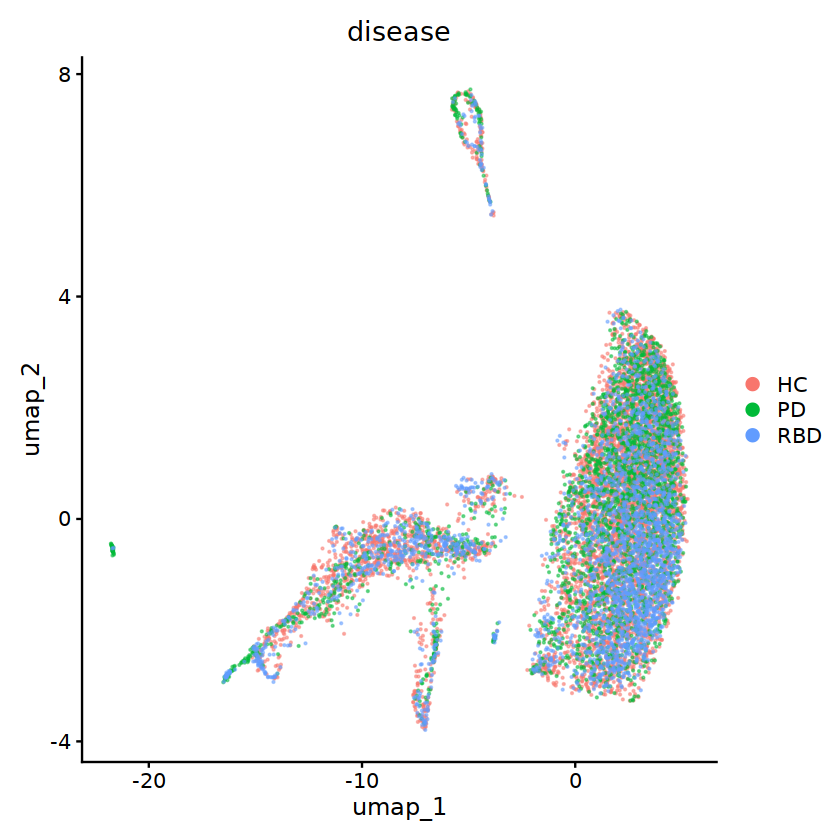

In [10]:
DimPlot(ifnb_testct, reduction = "umap", group.by = c("disease"), alpha=0.5)

# Identifying Marker Genes

In [6]:
set.seed(384)
cluster_markers <- list()
for (i in 0:10) {
  # Run FindMarkers for the current cluster and save the result in the list
  cluster_markers[[paste0("Cluster_", i)]] <- FindMarkers(ifnb_testct, ident.1 = i)
}

In [28]:
head(cluster_markers[["Cluster_10"]], 50)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MEGF11,0.000000e+00,7.263185,0.966,0.015,0.000000e+00
PDGFRA,0.000000e+00,7.431458,0.862,0.005,0.000000e+00
MYT1,0.000000e+00,8.010282,0.828,0.005,0.000000e+00
AC004852.2,0.000000e+00,8.943646,0.793,0.003,0.000000e+00
STK32A,0.000000e+00,7.362167,0.724,0.005,0.000000e+00
BX284613.2,0.000000e+00,7.203557,0.690,0.007,0.000000e+00
COL9A1,0.000000e+00,8.224002,0.655,0.002,0.000000e+00
NTN1,0.000000e+00,6.557917,0.586,0.005,0.000000e+00
FERMT1,0.000000e+00,7.698606,0.552,0.002,0.000000e+00


In [ ]:
library(openxlsx)

# Create a new workbook
wb <- createWorkbook()

for (i in 0:10) {
    # Filter the data for each cluster
    cluster_data <- cluster_markers[[paste0("Cluster_", i)]] %>% filter(p_val_adj < 0.05) %>% filter(avg_log2FC > 0.25)
    
    # Add a worksheet with the cluster name
    addWorksheet(wb, sheetName = paste0("Cluster_", i))
    
    # Write the filtered data to the worksheet
    writeData(wb, sheet = paste0("Cluster_", i), cluster_data, rowNames = TRUE)
}

# Save the workbook to an Excel file
saveWorkbook(wb, file = "../../Annotate_Mic_Subtype/11_clusters/Marker_Genes.xlsx", overwrite = TRUE)


## Heatmap of marker gene expression

First group.by variable `seurat_clusters` starts with a number, appending `g` to ensure valid variable names
This message is displayed once every 8 hours.


[1] "Num of top genes picked out by Cluster_0 : "
[1] 188
[1] "Num of top genes picked out by Cluster_1 : "
[1] 200
[1] "Num of top genes picked out by Cluster_2 : "
[1] 38
[1] "Num of top genes picked out by Cluster_3 : "
[1] 200
[1] "Num of top genes picked out by Cluster_4 : "
[1] 200
[1] "Num of top genes picked out by Cluster_5 : "
[1] 200
[1] "Num of top genes picked out by Cluster_6 : "
[1] 200
[1] "Num of top genes picked out by Cluster_7 : "
[1] 104
[1] "Num of top genes picked out by Cluster_9 : "
[1] 200
[1] "Num of top genes picked out by Cluster_10 : "
[1] 200


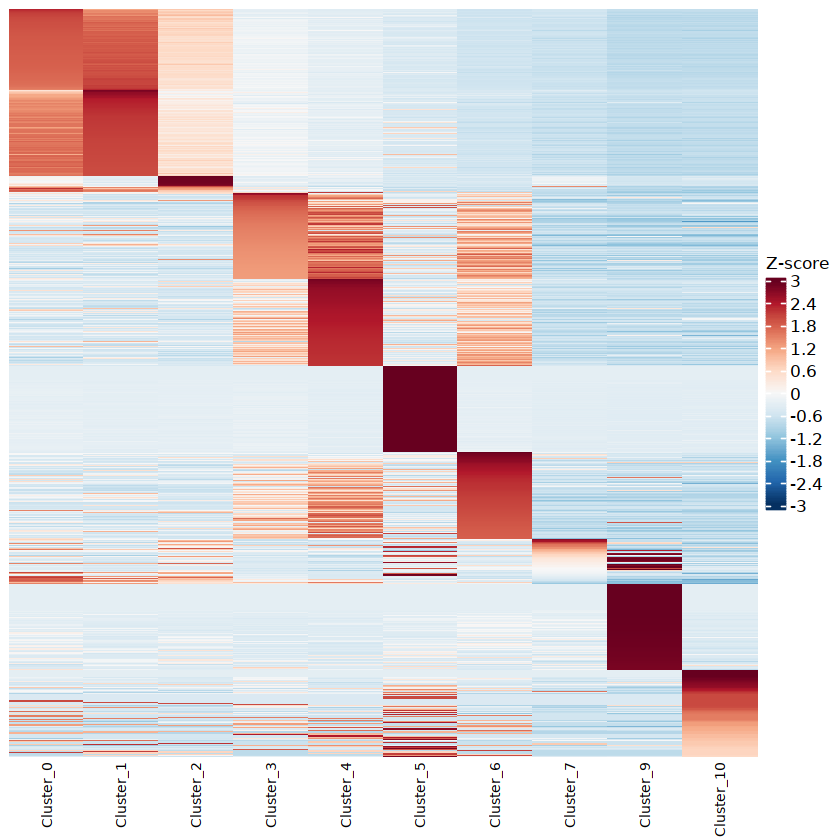

In [ ]:
# Load necessary libraries
library(Seurat)
library(ComplexHeatmap)
library(circlize)
library(RColorBrewer)
library(dplyr)

# Step 1: Prepare a master list of marker genes satisfying criteria
filtered_markers <- list()
for (cluster in names(cluster_markers)) {
  df <- cluster_markers[[cluster]]
  df$gene <- rownames(df)  # Add gene names as a column
  df$cluster <- cluster  # Store cluster name
  df <- df %>% filter(p_val_adj < 0.001, avg_log2FC > 0.25)  # Apply filtering criteria
  filtered_markers[[cluster]] <- df
}

# Combine into a single dataframe
master_list <- bind_rows(filtered_markers)

# Step 2: Compute average expression per cluster using AggregateExpression()
avg_expression <- AggregateExpression(ifnb_testct, features = unique(master_list$gene), 
                                      group.by = "seurat_clusters", assays = "RNA")$RNA

# Step 3: Standardize the expression matrix (Z-score transformation)
z_score_matrix <- t(scale(t(avg_expression)))  # Scale across genes (rows)

colnames(z_score_matrix) <- paste0("Cluster_", gsub("^g", "", colnames(z_score_matrix)))

# Step 4: Determine gene order based on highest z-score, keeping top 25% per cluster
gene_order <- c()  # Ordered gene list
top_genes_list <- list()  # Store selected top genes for each cluster
remaining_genes <- unique(master_list$gene)  # All unique genes that meet criteria

# cluster_order <- c("g5", "g0", "g1", "g2", "g4", "g3", "g6", "g9", "g7", "g10")
cluster_order <- c("Cluster_0", "Cluster_1", "Cluster_2", "Cluster_3", "Cluster_4", "Cluster_5", "Cluster_6", "Cluster_7", "Cluster_9", "Cluster_10")

for (c in cluster_order) {  # Iterate over clusters
  if (length(remaining_genes) == 0) break  # Stop if all genes are assigned

  # Subset only remaining genes
  df <- master_list %>% filter(cluster == c)
  # print(sprintf("Num of cluster %s enriched genes: ", c))
  # print(nrow(df))
  df <- df %>% filter(gene %in% remaining_genes)
  # print(sprintf("Num of cluster %s enriched genes that remains available: ", c))
  # print(nrow(df))
  if (nrow(df) == 0) next  # Skip if no remaining genes

  # Get z-scores for these genes
  df$z_score <- z_score_matrix[df$gene, c]

  # Sort genes by highest z-score
  df <- df[order(-df$z_score, na.last = NA), ]

  # Select only the top 10% of highly expressed genes for this cluster
  # top_25_count <- ceiling(nrow(df) * 0.1)  # Compute the number of genes in top 10%
  if (nrow(df) < 200){
    top_25_count <- nrow(df)
  }else{
      top_25_count <- 200
  }
  top_genes <- df$gene[1:top_25_count]  # Select top genes
  print(sprintf("Num of top genes picked out by %s : ", c))
  print(length(top_genes))

  # Add them to the gene order list
  gene_order <- c(gene_order, top_genes)
  top_genes_list[[c]] <- top_genes  # Store in list

  # Remove assigned genes from remaining genes
  remaining_genes <- setdiff(remaining_genes, top_genes)
}

# Step 5: Prepare heatmap matrix
heatmap_data <- z_score_matrix[gene_order, , drop = FALSE]  # Subset and maintain order
heatmap_data <- heatmap_data[, colnames(heatmap_data) != "Cluster_8", drop = FALSE]

# Step 6: Define color breaks and palette
color_breaks <- seq(-3, 3, length.out = 11)
col_fun <- colorRamp2(color_breaks, rev(brewer.pal(n = 11, name = "RdBu")))

# Step 7: Plot the heatmap
# pdf("../../man_figs_pdf/mic_marker_gene_zscore_heatmap2.pdf", width = 6, height = 12)
Heatmap(as.matrix(heatmap_data),
        name = "Z-score",
        col = col_fun,
        cluster_rows = FALSE,  # Use predefined gene order
        cluster_columns = FALSE,  # Keep cluster order
        show_row_names = FALSE,
        show_column_names = TRUE,
        column_order = cluster_order,  # Explicitly define column order
        row_names_gp = gpar(fontsize = 5),  # Improved readability
        column_names_gp = gpar(fontsize = 8),
        row_names_side = "left",  # Move gene labels to the left
        row_names_max_width = unit(10, "cm"),  # Allow more space for gene names
        heatmap_legend_param = list(title = "Z-score", at = color_breaks))
# dev.off()

In [ ]:
library(openxlsx)

# Save the dataframe as an Excel file
write.xlsx(heatmap_data, file = "../../Annotate_Mic_Subtype/11_clusters/mic_marker_gene_zscore_heatmap_data.xlsx", rowNames = TRUE)

# Annotating Mic subtypes

## Homeostatic Subtype

In [18]:
# Find which cluster most enriched for the two homeostatic marker genes --> Cluster 1
for (i in 0:10) {
    print(paste0("for cluster", i))
    thing = cluster_markers[[paste0("Cluster_", i)]]
    print(thing["P2RY12",])
    print(thing["CX3CR1",])
}

[1] "for cluster0"
              p_val avg_log2FC pct.1 pct.2    p_val_adj
P2RY12 3.895946e-16  0.2720008   0.6 0.564 1.425955e-11
            p_val avg_log2FC pct.1 pct.2 p_val_adj
CX3CR1 0.07427014  0.2895709 0.284 0.285         1
[1] "for cluster1"
               p_val avg_log2FC pct.1 pct.2     p_val_adj
P2RY12 7.175119e-178  0.9847713 0.762 0.515 2.626165e-173
               p_val avg_log2FC pct.1 pct.2    p_val_adj
CX3CR1 9.209705e-104   1.087878 0.439 0.235 3.370844e-99
[1] "for cluster2"
              p_val avg_log2FC pct.1 pct.2    p_val_adj
P2RY12 2.176377e-26 -0.2880592 0.431 0.611 7.965759e-22
              p_val avg_log2FC pct.1 pct.2    p_val_adj
CX3CR1 3.076999e-32 -0.4843083 0.169 0.313 1.126212e-27
[1] "for cluster3"
              p_val avg_log2FC pct.1 pct.2 p_val_adj
P2RY12 6.358385e-05 -0.7431756 0.638 0.571         1
           p_val avg_log2FC pct.1 pct.2 p_val_adj
CX3CR1 0.6934006  -0.581762 0.332 0.282         1
[1] "for cluster4"
              p_val avg_log2FC 

In [ ]:
pdf("../../man_figs_pdf/mic_homeo_heat.pdf", width = 8, height = 8)
# Define the two homeostatic marker genes
homeostatic_genes <- c("P2RY12", "CX3CR1")

# Initialize an empty matrix to store the enrichment values (e.g., adjusted p-values)
enrichment_matrix <- matrix(NA, nrow = length(homeostatic_genes), ncol = 11, 
                            dimnames = list(homeostatic_genes, paste0("Cluster_", 0:10)))

# Populate the matrix with adjusted p-values or log fold changes for each gene and cluster
for (i in 0:10) {
    cluster_name <- paste0("Cluster_", i)
    thing <- cluster_markers[[cluster_name]]
    for (gene in homeostatic_genes) {
        # Check if the gene exists in the cluster data and extract the adjusted p-value
        if (gene %in% rownames(thing)) {
            enrichment_matrix[gene, paste0("Cluster_", i)] <- thing[gene, "p_val_adj"]
        }
    }
}

# Transform p-values for better visualization (e.g., using -log10 scale)
enrichment_matrix_transformed <- -log10(enrichment_matrix)
enrichment_matrix_transformed[is.infinite(enrichment_matrix_transformed)] <- NA  # Handle p-values that were zero

# Plot the heatmap
pheatmap(enrichment_matrix_transformed,
         color = colorRampPalette(c("white", "#fc9272", "#de2d26"))(100),
         na_col = "grey",            # Grey for NA values (genes not detected in certain clusters)
         main = "Adj p-val Heatmap for Homeostatic Genes across Clusters",
         cluster_rows = FALSE,       # Do not cluster rows (keep P2RY12 and CX3CR1 as is)
         cluster_cols = FALSE,       # Keep clusters in original order
         angle_col = "45",             # Rotate column names for readability
         fontsize_row = 10,          # Font size for gene names
         fontsize_col = 10)          # Font size for cluster labels

dev.off()

pdf 
  2

## T-cells

From this code section, we see that there are very few visible T-cells in this data. 

In [5]:
# Check if the genes are present in the dataset
genes_of_interest <- c("CD3D", "CD3E", "TRAC")
genes_present <- genes_of_interest %in% rownames(ifnb_testct)
print(genes_present)

[1] TRUE TRUE TRUE


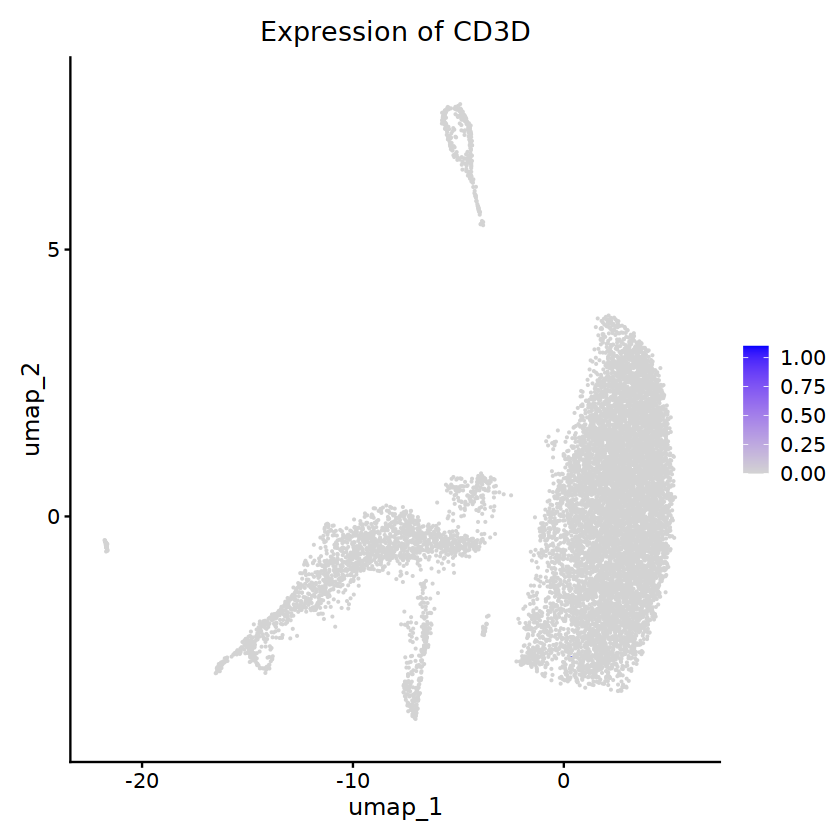

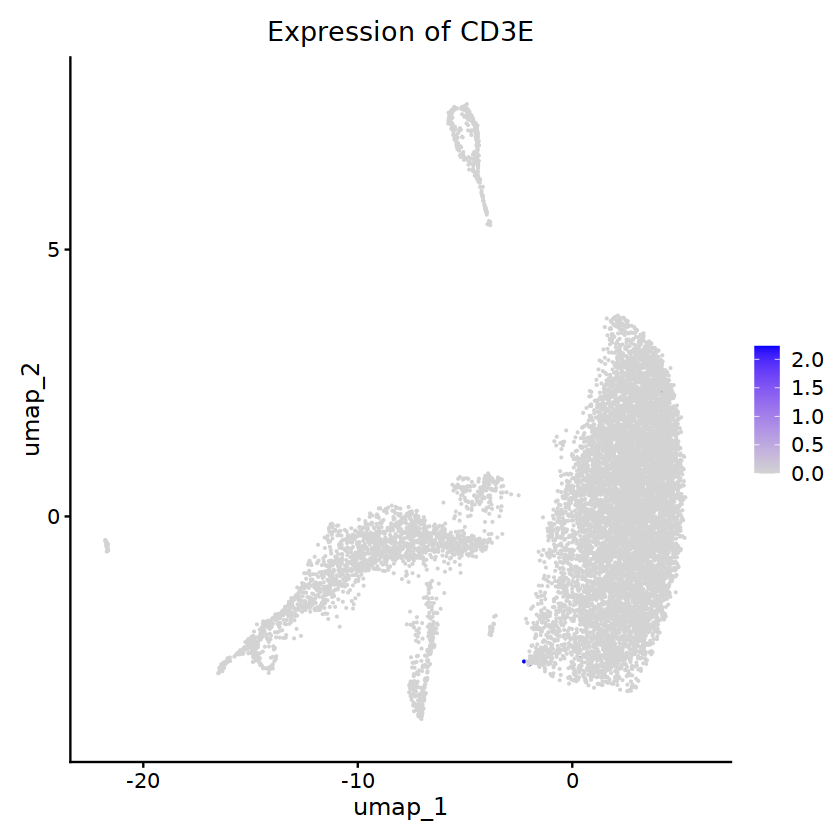

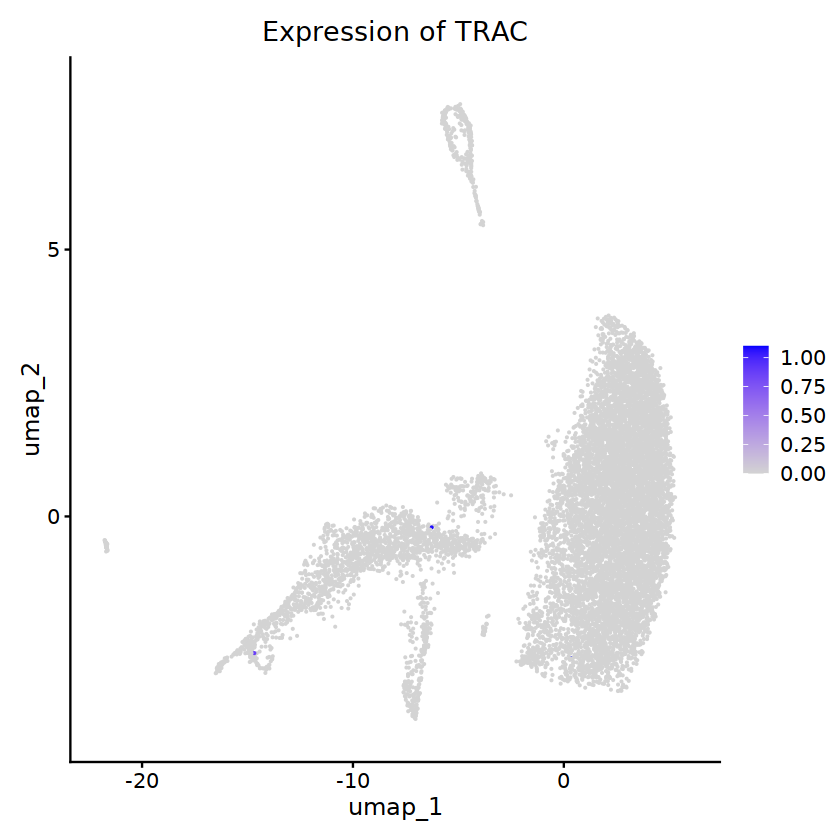

In [5]:
T_genes <- c("CD3D", "CD3E", "TRAC")
# Loop through each gene in BAM_genes and create a FeaturePlot
for (gene in T_genes) {
  if (gene %in% rownames(ifnb_testct)) { # Check if the gene exists in the Seurat object
    p <- FeaturePlot(
      object = ifnb_testct,
      features = gene,
      reduction = "umap",
      cols = c("lightgrey", "blue"), # Customize the color gradient for expression
      pt.size = 0.1                  # Adjust point size
    ) + 
    ggtitle(paste("Expression of", gene))
    
    print(p) # Display the plot
  } else {
    cat(paste("Gene", gene, "not found in Seurat object\n"))
  }
}


In [7]:
# Extract expression data for the CD3D gene
trac_expression <- GetAssayData(ifnb_testct, assay = "RNA", slot = "data")["CD3D", ]

# Find cells where the expression is not zero
nonzero_cells <- trac_expression[trac_expression > 0]

# Print the cells and their expression values
print(nonzero_cells)

Warning message:
“The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.”


HC2029PFC_MAH_GACTCACCATCCCTCA-1 
                         1.10075 


In [8]:
# Extract expression data for the CD3D gene
trac_expression <- GetAssayData(ifnb_testct, assay = "RNA", slot = "data")["CD3E", ]

# Find cells where the expression is not zero
nonzero_cells <- trac_expression[trac_expression > 0]

# Print the cells and their expression values
print(nonzero_cells)

HC2029PFC_MAH_GACTCACCATCCCTCA-1 HC2029PFC_MAH_GGAACCACAGTTTCTC-1 
                        1.612003                         1.698963 
HC2070PFC_MAH_TTAGGCCCAAAGCTCC-1 HC2204PFC_MAH_GAGGAGGCACAAACTT-1 
                        1.638876                         2.232849 
PD0417PFC_MAH_CACGCAATCTGGCAAT-1 PD0417PFC_MAH_GACTATTCACCTAATG-1 
                        2.000097                         1.585552 


In [47]:
# Extract expression data for the TRAC gene
trac_expression <- GetAssayData(ifnb_testct, assay = "RNA", slot = "data")["TRAC", ]

# Find cells where the expression is not zero
nonzero_cells <- trac_expression[trac_expression > 0]

# Print the cells and their expression values
print(nonzero_cells)

 HC1943PFC_MAH_GTAGGCGAGGAGCACG-1  HC2029PFC_MAH_GACTCACCATCCCTCA-1 
                        1.0788757                         1.1007502 
RBD1546PFC_MAH_ACATTAGTCCGTGACA-1 RBD1762PFC_MAH_CGGTTGGGTTACATCC-1 
                        1.0884499                         0.8709091 


In [48]:
# Extract expression data for the TRAC gene
trac_expression <- GetAssayData(ifnb_testct, assay = "RNA", slot = "data")["TRAC", ]

# Find cells where the expression is not zero
nonzero_cells <- names(trac_expression[trac_expression > 0])

# Extract metadata for these cells
metadata <- ifnb_testct@meta.data[nonzero_cells, ]

# Print the metadata
# print(metadata)

# Optionally convert to a data frame for easier viewing
metadata_df <- data.frame(Cell = rownames(metadata), metadata)
print(metadata_df)

                                                               Cell
HC1943PFC_MAH_GTAGGCGAGGAGCACG-1   HC1943PFC_MAH_GTAGGCGAGGAGCACG-1
HC2029PFC_MAH_GACTCACCATCCCTCA-1   HC2029PFC_MAH_GACTCACCATCCCTCA-1
RBD1546PFC_MAH_ACATTAGTCCGTGACA-1 RBD1546PFC_MAH_ACATTAGTCCGTGACA-1
RBD1762PFC_MAH_CGGTTGGGTTACATCC-1 RBD1762PFC_MAH_CGGTTGGGTTACATCC-1
                                     orig.ident nCount_RNA nFeature_RNA
HC1943PFC_MAH_GTAGGCGAGGAGCACG-1  SeuratProject       5151         2997
HC2029PFC_MAH_GACTCACCATCCCTCA-1  SeuratProject       4984         2571
RBD1546PFC_MAH_ACATTAGTCCGTGACA-1 SeuratProject       5077         2339
RBD1762PFC_MAH_CGGTTGGGTTACATCC-1 SeuratProject       7199         3405
                                  nCount_ATAC nFeature_ATAC nucleosome_signal
HC1943PFC_MAH_GTAGGCGAGGAGCACG-1        17080          8313         0.7315707
HC2029PFC_MAH_GACTCACCATCCCTCA-1        17958          7952         0.5996860
RBD1546PFC_MAH_ACATTAGTCCGTGACA-1        4931          2369       

As of Seurat v5, we recommend using AggregateExpression to perform pseudo-bulk analysis.
This message is displayed once per session.
First group.by variable `seurat_clusters` starts with a number, appending `g` to ensure valid variable names
This message is displayed once every 8 hours.


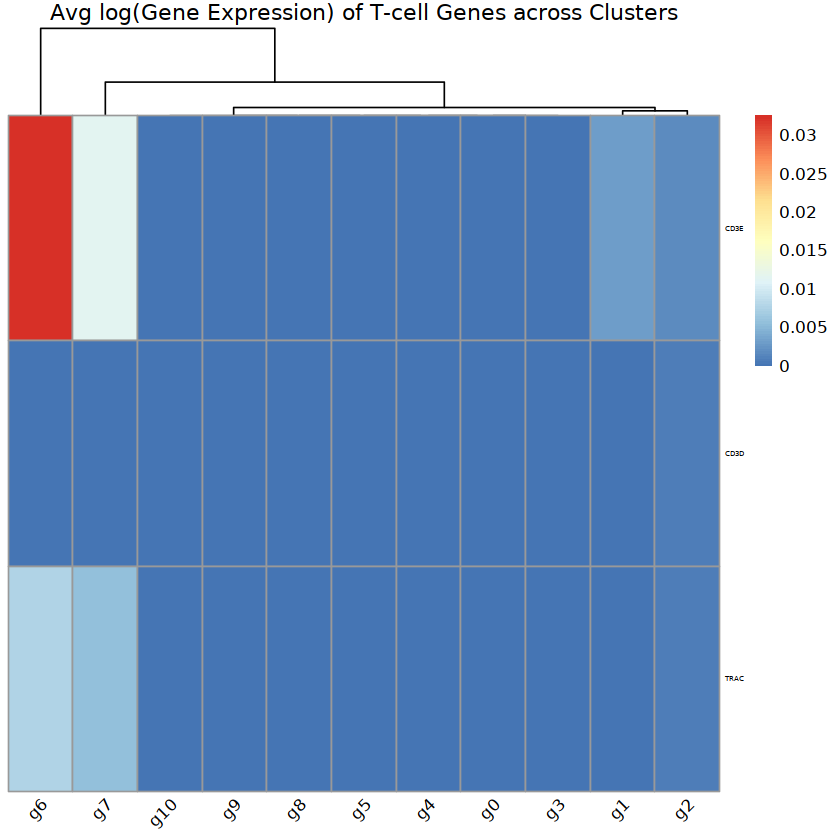

In [9]:
library(pheatmap)

neurotransmitter_genes <- c("CD3D", "CD3E", "TRAC")

# Ensure these genes are present in the dataset
neurotransmitter_genes <- neurotransmitter_genes[neurotransmitter_genes %in% rownames(ifnb_testct)]

# Calculate average expression for each cluster
ifnb_testct_avg <- AverageExpression(ifnb_testct, features = neurotransmitter_genes, group.by = "seurat_clusters", slot = "data")
ifnb_testct_avg <- ifnb_testct_avg$RNA

# Log-transform the average expression values for better visualization
ifnb_testct_avg_log <- log1p(ifnb_testct_avg)

# Plot the heatmap using pheatmap
pheatmap::pheatmap(ifnb_testct_avg_log,
                   cluster_rows = FALSE,       # Do not cluster genes (rows)
                   cluster_cols = TRUE,       # Do not cluster clusters (columns)
                   scale = "none",             # Do not scale; values are already log-transformed
                   angle_col = 45,             # Rotate column names for readability
                   main = "Avg log(Gene Expression) of T-cell Genes across Clusters",
                   fontsize_row = 4,           # Font size for gene names
                   fontsize_col = 10)          # Font size for cluster labels

## Neuron Surveilliance Subtype

https://svn.bmj.com/content/1/2/52

In [ ]:
neurotransmitter_genes <- c("GRM6", "GABRE", "HTR3A", "HTR1A", "ADRA2A", "HTR1D", "ASMTL",
                            "CHRNA5", "GABARAPL1", "OGFR", "TRAK2", "CALY", "OPRM1", "GABRR2",
                            "TERF2IP", "GRK2", "VTA1", "CHRND", "CHRNA9", "DNAJC14", "GLRA1",
                            "CHRNA6", "GABARAP", "GRIN3B", "CHRNB4", "CHRNE", "CDNF", "DRD4",
                            "ADRB1", "CHRNB1", "CHRFAM7A", "KLF16", "CUTA", "ADRB2", "SIGMAR1",
                            "GABARAPL2", "AANAT", "ADRA2C", "CHRNA10", "OPRL1", "YRDC", "SLC6A4",
                            "HTR2B", "GRIK5", "G140rf28", "GRIN2D", "GRIN1", "ASMT", "RIC3",
                            "COLQ", "GABRD", "CHRM1", "RAPSN", "CHRNB3", "HRH4", "GABRR1", "DRD3",
                            "ACHE", "HRH3", "SLC6A3", "GABRP", "DBH", "GLRA4", "HTR6", "CHRNA1",
                            "HTR3C", "CHRNA3", "CHRNA4", "ADRA1D", "CHRM5", "GABRA3", "GRM2",
                            "CHRNB2", "ADRA2B", "GRIK1", "GABBR1", "GABRA5", "GRIN2C", "CHRNA7",
                            "GABRA1", "PPP1R1B", "DRD1", "HT5A", "OPRK1", "SULT1A3", "SLC6A12",
                            "CHRNG", "HTR3E", "DRD5", "HTR7", "HRH1", "CBWD5", "PDCD6IP", "HNMT",
                            "HRH2", "TPT1", "OGFRL1", "GRK3", "DOCK10")

# Define the output PDF path
output_pdf <- "../../man_figs_pdf/mic_neurotransmitter_heat.pdf"

# Initialize a matrix to store the adjusted p-values for each gene and cluster
pval_matrix <- matrix(NA, nrow = length(neurotransmitter_genes), ncol = 11,
                      dimnames = list(neurotransmitter_genes, paste0("Cluster_", 0:10)))

# Populate the matrix with adjusted p-values from the precomputed results
for (i in 0:10) {
  cluster_name <- paste0("Cluster_", i)
  
  # Get the markers for the current cluster from the list
  markers <- cluster_markers[[cluster_name]]
  
  # Filter for neurotransmitter genes and store the adjusted p-values in the matrix
  markers <- markers[rownames(markers) %in% neurotransmitter_genes, ]
  pval_matrix[rownames(markers), paste0("Cluster_", i)] <- markers$p_val_adj
}

# Transform p-values for better visualization (e.g., using -log10 scale)
pval_matrix_transformed <- -log10(pval_matrix)
pval_matrix_transformed[is.infinite(pval_matrix_transformed)] <- NA  # Handle p-values that were zero

# Save the heatmap directly to a PDF using the `filename` argument
pheatmap::pheatmap(
  pval_matrix_transformed,
  color = colorRampPalette(c("white",'#fff5f0','#fee0d2','#fcbba1','#fc9272','#fb6a4a','#ef3b2c','#cb181d','#a50f15','#67000d'))(100),
  cluster_rows = FALSE,      # Do not cluster genes (rows)
  cluster_cols = FALSE,      # Do not cluster clusters (columns)
  na_col = "white",           # Use white for NA values (e.g., missing genes in clusters)
  main = "Adjusted p-value Heatmap for Neurotransmitter Receptor Genes",
  angle_col = 45,            # Rotate column names for readability
  fontsize_row = 4,          # Font size for gene names
  fontsize_col = 10,         # Font size for cluster labels
  filename = output_pdf      # Save directly to PDF
)

# Confirm saving
message("Heatmap saved to: ", output_pdf)

Heatmap saved to: ../man_figs_pdf/mic_neurotransmitter_heat.pdf



## Phagocyte Subtype

In [ ]:
pha <- c("F13A1", "CD163", "ITSN1", "STARD13", "IQGAP2", "ARHGAP18", "TGFBI", "MCTP1", 
         "MS4A4A", "EYA2", "TRPS1", "FMN1", "FCHO2", "CD163L1", "THRB", "DPYD", 
         "MS4A4E", "DRAM1", "IQGAP1", "ADGRG6", "EPB41L3", "CPM", "MSR1")

# Define the output PDF path
output_pdf <- "../../man_figs_pdf/mic_phagocyte_heat.pdf"

# Initialize an empty matrix to store the adjusted p-values
pval_matrix <- matrix(NA, nrow = length(pha), ncol = 11, 
                      dimnames = list(pha, paste0("Cluster_", 0:10)))

# Populate the matrix with adjusted p-values for each gene and cluster
for (i in 0:10) {
    cluster_name <- paste0("Cluster_", i)
    thing <- cluster_markers[[cluster_name]]
    for (gene in pha) {
        # Extract adjusted p-value and store it in the matrix
        if (gene %in% rownames(thing)) {
            pval_matrix[gene, paste0("Cluster_", i)] <- thing[gene, "p_val_adj"]
        }
    }
}

# Transform p-values for better visualization (e.g., using -log10 scale)
pval_matrix_transformed <- -log10(pval_matrix)
pval_matrix_transformed[is.infinite(pval_matrix_transformed)] <- NA  # Handle p-values that were zero

max_value <- 80  # Adjust this to control the color scaling; 15 here compresses higher values
breaks <- seq(0, max_value, length.out = 100)  # Generate breaks for the color scale

# Plot the heatmap
pheatmap::pheatmap(pval_matrix_transformed,
         color = colorRampPalette(c("white",'#fff5f0','#fee0d2','#fcbba1','#fc9272','#fb6a4a','#ef3b2c','#cb181d','#a50f15','#67000d'))(100),
         breaks = breaks,
         na_col = "white",            # Grey for NA values (genes not detected in certain clusters)
         main = "-log(adjusted p-value) for Phagocytic Genes across Clusters",
         cluster_rows = FALSE,        # Cluster genes for better visualization
         cluster_cols = FALSE,       # Keep clusters in original order
         angle_col = "45",             # Rotate column names for readability
         fontsize_row = 8,           # Font size for gene names
         fontsize_col = 10,          # Font size for cluster labels
         filename = output_pdf      # Save directly to PDF
)          

# Confirm saving
message("Heatmap saved to: ", output_pdf)

Heatmap saved to: ../man_figs_pdf/mic_phagocyte_heat.pdf



# GO Enrichment Analysis for Marker Genes of each Mic subtype

In [22]:
# Define the database(s) to use for EnrichR, focusing on GO Biological Process
set.seed(384)
dbs <- c("GO_Biological_Process_2021")

# Initialize lists to store enrichment results and average fold changes
enrichment_results <- list()
marker_counts <- list() 

# Loop over each cluster in cluster_markers to perform enrichment analysis
for (i in 0:10) {
  # Retrieve markers for the current cluster from the precomputed list
  cluster_name <- paste0("Cluster_", i)
  cluster_data <- cluster_markers[[cluster_name]]
  
  # Filter by adjusted p-value
  significant_genes <- rownames(cluster_data[cluster_data$p_val_adj < 0.05 & cluster_data$avg_log2FC > 0.25, ])
    
  marker_counts[[paste0("Cluster_", i)]] <- length(significant_genes)
  
  if (length(significant_genes) > 0) {
    set.seed(384)
    enrich_result <- enrichr(significant_genes, dbs)
    go_results <- enrich_result[["GO_Biological_Process_2021"]]
    go_results <- go_results[order(go_results$Adjusted.P.value), ]
    top_processes <- head(go_results, 10)

    # Initialize list to store the average fold change for each GO term
    avg_fc_for_terms <- numeric(nrow(top_processes))
    
    # Calculate the average fold change for each GO term in top_processes
    for (j in 1:nrow(top_processes)) {
      genes_in_term <- strsplit(top_processes$Genes[j], ";")[[1]]  # Split the genes string by comma and space
      
      # Only keep genes that are present in cluster_data
      genes_in_term <- genes_in_term[genes_in_term %in% rownames(cluster_data)]
        
      # Retrieve fold changes for these genes
      if (length(genes_in_term) > 0) {
        fc_values <- cluster_data[genes_in_term, "avg_log2FC"]
        avg_fc_for_terms[j] <- mean(fc_values, na.rm = TRUE)  # Calculate the average, ignoring NA values
      } else {
        avg_fc_for_terms[j] <- NA  # If no genes are found, set to NA
      }
    }

    # Add the average fold changes as a new column in top_processes
    top_processes$Avg_Log2FC <- avg_fc_for_terms

    # Store the updated top_processes in enrichment_results
    enrichment_results[[paste0("Cluster_", i)]] <- top_processes
  }
}


Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  

In [10]:
marker_counts

$Cluster_0
[1] 214

$Cluster_1
[1] 644

$Cluster_2
[1] 70

$Cluster_3
[1] 2706

$Cluster_4
[1] 4019

$Cluster_5
[1] 6353

$Cluster_6
[1] 3999

$Cluster_7
[1] 145

$Cluster_8
[1] 3909

$Cluster_9
[1] 2705

$Cluster_10
[1] 1852

In [ ]:
enrichment_results <- readRDS("../../Annotate_Mic_Subtype/11_clusters/cached_enrichment_results.rds")

# Prepare a matrix for plotting
# Collect unique biological processes across all clusters
all_processes <- unique(unlist(lapply(enrichment_results, function(x) x$Term)))
# Exclude Cluster_8 from the columns
clusters_to_include <- setdiff(paste0("Cluster_", 0:10), "Cluster_8")
enrichment_matrix <- matrix(NA, nrow = length(all_processes), ncol = length(clusters_to_include),
                            dimnames = list(all_processes, clusters_to_include))

# Fill the matrix with -log10(adjusted p-value) for each process and cluster
for (cluster_name in clusters_to_include) {
  if (!is.null(enrichment_results[[cluster_name]])) {
    for (j in 1:nrow(enrichment_results[[cluster_name]])) {
      process <- enrichment_results[[cluster_name]]$Term[j]
      pval <- enrichment_results[[cluster_name]]$Adjusted.P.value[j]
      enrichment_matrix[process, cluster_name] <- -log10(pval)
    }
  }
}                         

# Replace NA values with a low number (e.g., 0) for better plotting
enrichment_matrix[is.na(enrichment_matrix)] <- 0

output_pdf <- "../../man_figs_pdf/mic_go_logp.pdf"

# Plot the heatmap using pheatmap
enrichment_heatmap <- pheatmap::pheatmap(enrichment_matrix,
                                         color = c(
                                           colorRampPalette(c("white", '#ef3b2c'))(10),  # More resolution for small values
                                           colorRampPalette(c('#ef3b2c', '#cb181d', '#a50f15', '#67000d'))(90) # High contrast for larger values
                                         ),
                                         na_col = "grey",           # Use grey for NA values (e.g., processes not enriched in clusters)
                                         main = "Enriched Biological Processes of Microglial State Signatures",
                                         cluster_rows = TRUE,       # Cluster processes for better visualization
                                         cluster_cols = TRUE,       # Cluster clusters for better visualization
                                         angle_col = 45,            # Rotate column names for readability
                                         fontsize_row = 6,          # Font size for process names
                                         fontsize_col = 8,
                                         filename = output_pdf)     # Save to PDF
print("Plot saved")

# Extract the clustering order
row_order <- enrichment_heatmap$tree_row$order
col_order <- enrichment_heatmap$tree_col$order

[1] "Plot saved"


In [24]:
for (i in 0:10){
    print(paste0("For cluster ", i))
    print(enrichment_results[[paste0("Cluster_", i)]]$Term)
}

[1] "For cluster 0"
 [1] "cellular response to cytokine stimulus (GO:0071345)"                          
 [2] "regulation of small GTPase mediated signal transduction (GO:0051056)"         
 [3] "neutrophil activation involved in immune response (GO:0002283)"               
 [4] "transmembrane receptor protein tyrosine kinase signaling pathway (GO:0007169)"
 [5] "positive regulation of signal transduction (GO:0009967)"                      
 [6] "neutrophil degranulation (GO:0043312)"                                        
 [7] "regulation of cytokine-mediated signaling pathway (GO:0001959)"               
 [8] "myeloid cell differentiation (GO:0030099)"                                    
 [9] "neutrophil mediated immunity (GO:0002446)"                                    
[10] "synapse pruning (GO:0098883)"                                                 
[1] "For cluster 1"
 [1] "cellular response to cytokine stimulus (GO:0071345)"                          
 [2] "regulation of small

In [ ]:
enrichment_results <- readRDS("../../Annotate_Mic_Subtype/11_clusters/cached_enrichment_results.rds")
# Prepare a matrix for plotting
# Collect unique biological processes across all clusters
all_processes <- unique(unlist(lapply(enrichment_results, function(x) x$Term)))
# Exclude Cluster_8 from the columns
clusters_to_include <- setdiff(paste0("Cluster_", 0:10), "Cluster_8")
fc_matrix <- matrix(NA, nrow = length(all_processes), ncol = length(clusters_to_include),
                    dimnames = list(all_processes, clusters_to_include))

# Fill the matrix with Avg_Log2FC for each process and cluster
for (cluster_name in clusters_to_include) {
  if (!is.null(enrichment_results[[cluster_name]])) {
    for (j in 1:nrow(enrichment_results[[cluster_name]])) {
      process <- enrichment_results[[cluster_name]]$Term[j]
      avg_log2fc <- enrichment_results[[cluster_name]]$Avg_Log2FC[j]
      # Fill fold change matrix with Avg_Log2FC
      fc_matrix[process, cluster_name] <- avg_log2fc
    }
  }
}                        

# Replace NA values with a low number (e.g., 0) for better plotting
fc_matrix[is.na(fc_matrix)] <- 0

fc_matrix_ordered <- fc_matrix[row_order, col_order]

# Define the custom color palettes
# negative_colors <- colorRampPalette(c('#f7fbff','#deebf7','#c6dbef','#9ecae1','#6baed6','#4292c6', '#2171b5', '#084594'))(50)
negative_colors <- colorRampPalette(c('#084594','#2171b5','#4292c6','#6baed6','#9ecae1','#c6dbef', '#deebf7', '#f7fbff'))(50)
positive_colors <- colorRampPalette(c('#fff5f0','#fee0d2','#fcbba1','#fc9272','#fb6a4a','#ef3b2c','#cb181d','#99000d'))(50)

# Combine palettes with white at 0
custom_colors <- c(negative_colors, "white", positive_colors)

# Define custom breaks to center the color scale at 0
max_abs_value <- max(abs(fc_matrix_ordered))
breaks <- seq(-max_abs_value, max_abs_value, length.out = length(custom_colors) + 1)

output_pdf = "../../man_figs_pdf/mic_go_log2fc.pdf"
pheatmap::pheatmap(fc_matrix_ordered,
                   color = custom_colors,
                   breaks = breaks,              # Use custom breaks for diverging colors
                   na_col = "grey",              # Use grey for NA values
                   main = "Average Log2 Fold Change",
                   cluster_rows = FALSE,          # Cluster processes for better visualization
                   cluster_cols = FALSE,          # Cluster clusters for better visualization
                   angle_col = 45,               # Rotate column names for readability
                   fontsize_row = 6,             # Font size for process names
                   fontsize_col = 8,
                   filename = output_pdf)             # Font size for cluster labels
print("File saved")

[1] "File saved"


In [ ]:
library(openxlsx)
# Create a new workbook
wb <- createWorkbook()

# Loop through clusters 0 to 10, excluding 9
for (i in 0:10) {
    # Filter the data for each cluster
    cluster_data <- enrichment_results[[paste0("Cluster_", i)]]
    
    # Add a worksheet with the cluster name
    addWorksheet(wb, sheetName = paste0("Cluster_", i))
    
    # Write the filtered data to the worksheet
    writeData(wb, sheet = paste0("Cluster_", i), cluster_data, rowNames = TRUE)
}

# Save the workbook to an Excel file
saveWorkbook(wb, file = "../../Annotate_Mic_Subtype/11_clusters/GO_Results.xlsx", overwrite = TRUE)


In [ ]:
saveRDS(enrichment_results, "../../Annotate_Mic_Subtype/11_clusters/cached_enrichment_results.rds")